<a href="https://colab.research.google.com/github/KHN70/CN6005-Ai-Weekly-Portfolio/blob/main/Explainable_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Squared Error: 2900.19
R² Score: 0.45


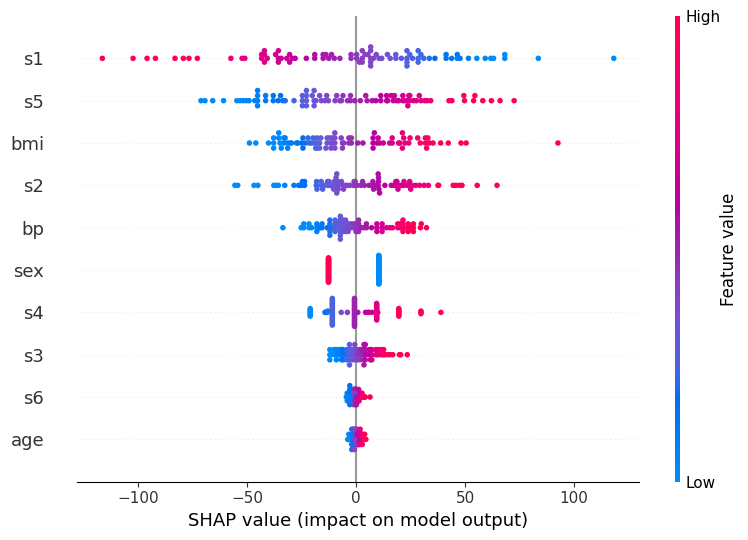

In [4]:
import shap
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# Load the diabetes dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name="target")
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")
# SHAP explanation
explainer = shap.Explainer(model.predict, X_train)
shap_values = explainer(X_test)
# SHAP summary plot
shap.summary_plot(shap_values, X_test)

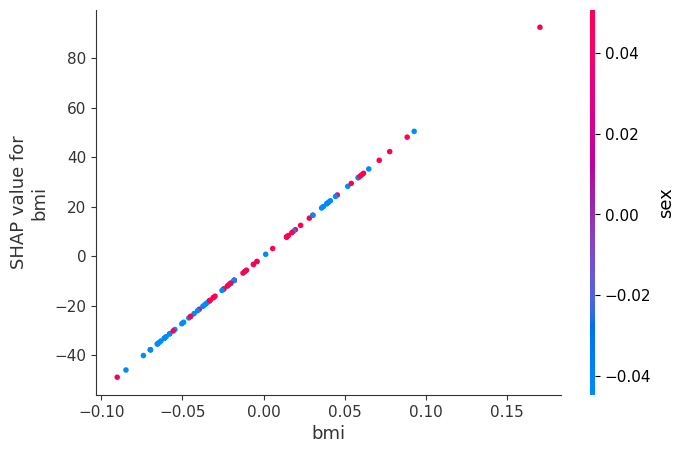

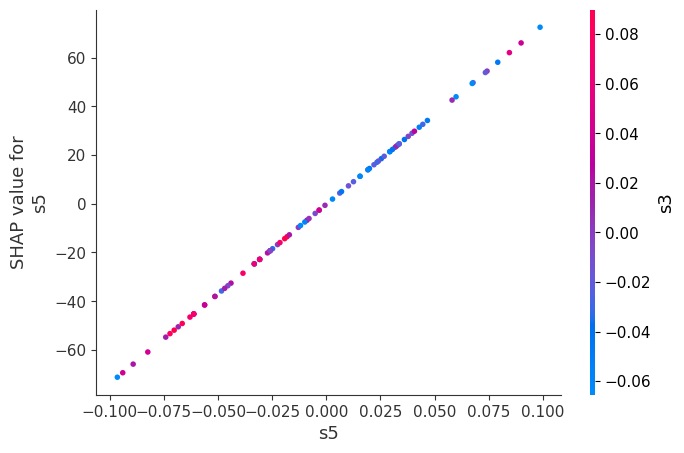

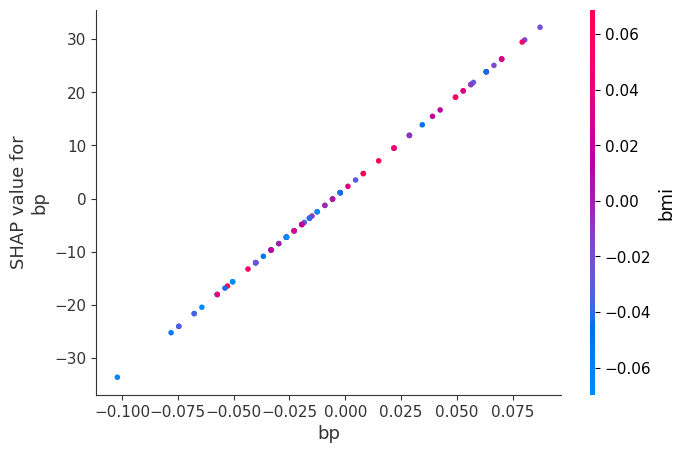

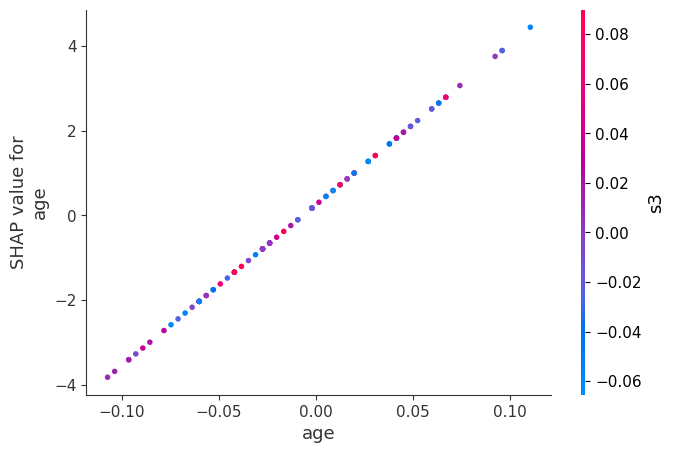

In [5]:

# Generate SHAP dependence plots
selected_features = ['bmi', 's5', 'bp', 'age']
for feature in selected_features:
    shap.dependence_plot(feature, shap_values.values, X_test, feature_names=X_test.columns)
    plt.savefig(f"shap_dependence_{feature}.png")
    plt.close()


In [6]:
# Check for missing values
print("Missing values in X:")
print(X.isnull().sum())
print("\nMissing values in y:")
print(y.isnull().sum())
# The dataset is already loaded and split in the previous cells, so no need to split again.
# The dataset is also clean and does not require scaling or encoding for linear regression.

Missing values in X:
age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

Missing values in y:
0


In [7]:
from sklearn.datasets import load_diabetes
import pandas as pd

# Load the diabetes dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name="target")

# Check for missing values
print("Missing values in X:")
print(X.isnull().sum())
print("\nMissing values in y:")
print(y.isnull().sum())

# The dataset is clean and does not require scaling or encoding for linear regression.
# Separate features and target (already done above)
# X and y are already defined as pandas DataFrame and Series respectively.

Missing values in X:
age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

Missing values in y:
0


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the calculated MSE and R-squared values
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 2900.19
R² Score: 0.45


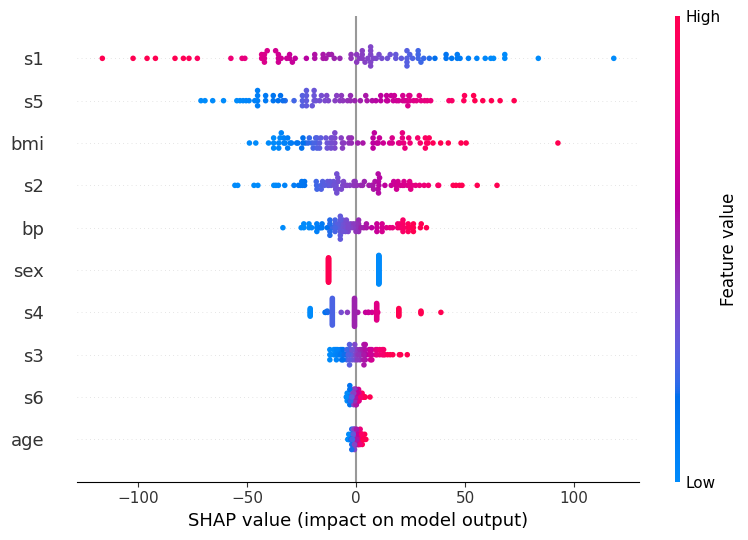

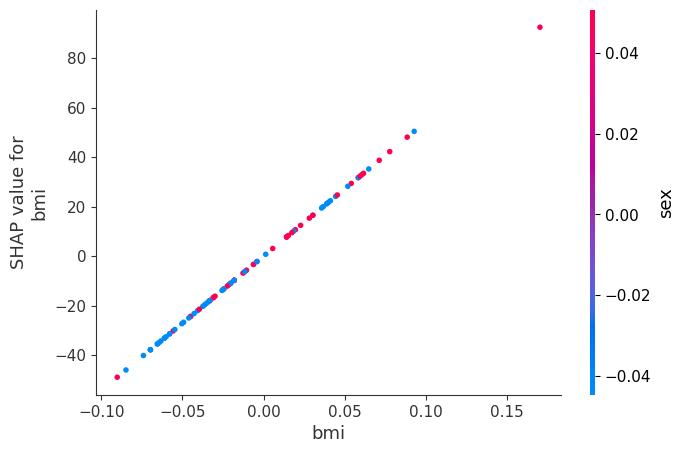

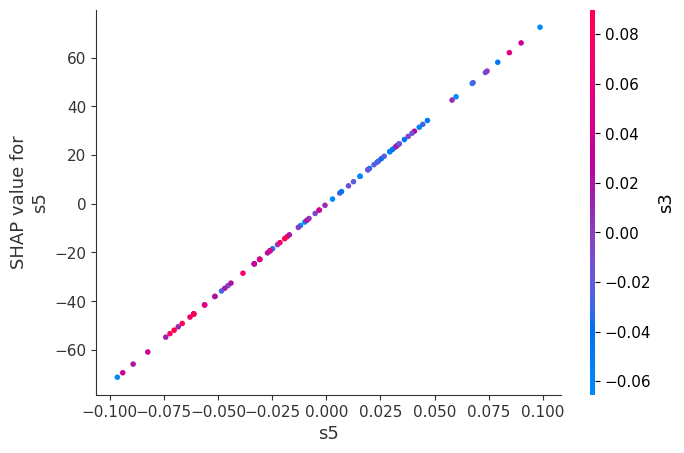

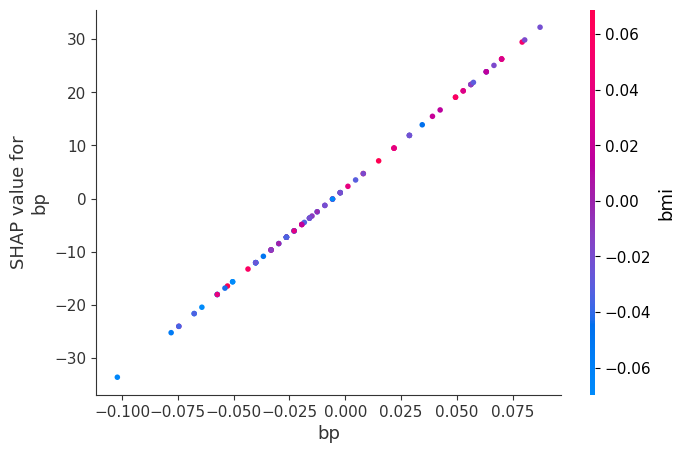

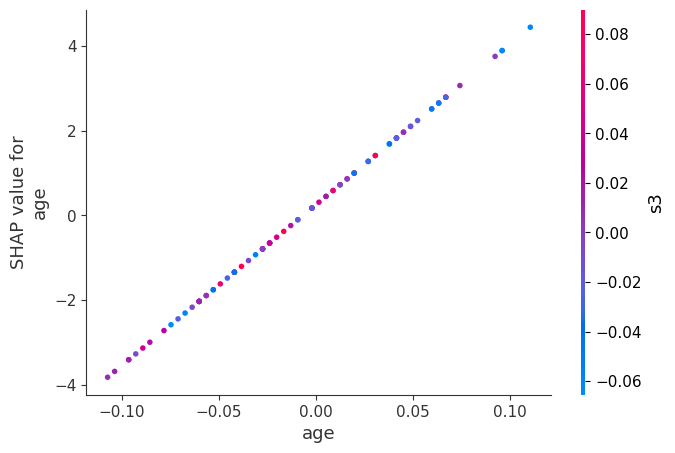

In [9]:
# Generate SHAP summary plot
shap.summary_plot(shap_values, X_test)

# Generate SHAP dependence plots for the selected features
selected_features = ['bmi', 's5', 'bp', 'age']
for feature in selected_features:
    shap.dependence_plot(feature, shap_values.values, X_test, feature_names=X_test.columns)

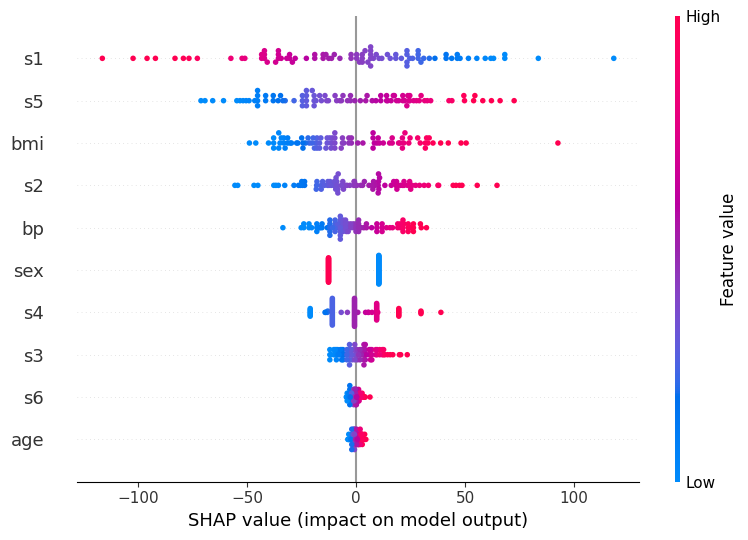

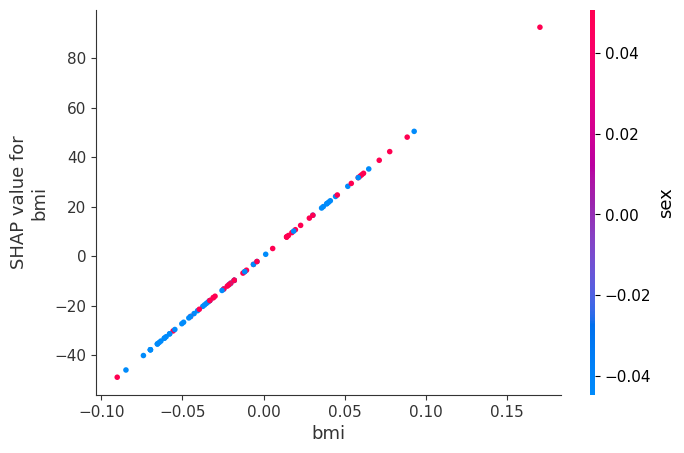

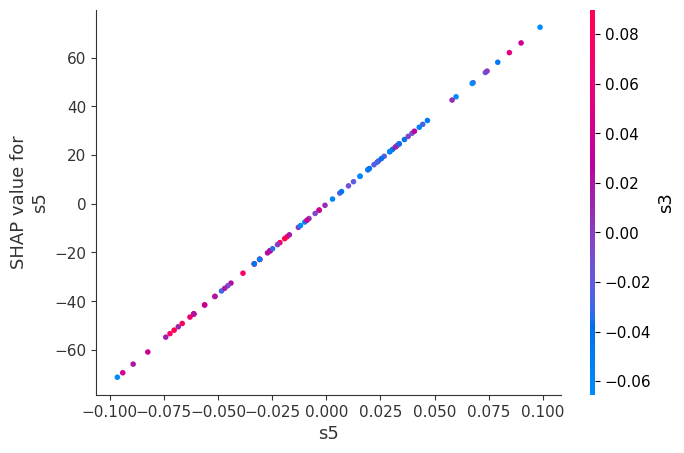

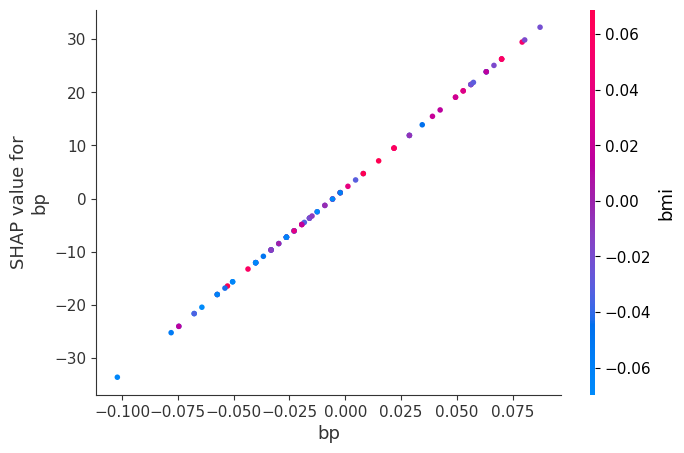

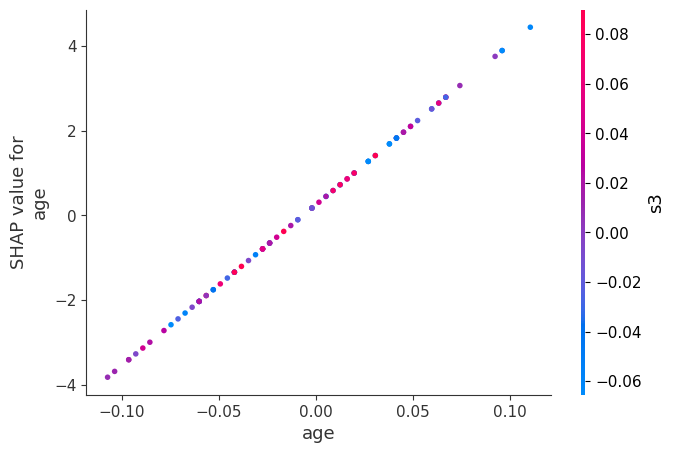

In [10]:
import shap
# Create a SHAP Explainer object
explainer = shap.Explainer(model.predict, X_train)

# Calculate SHAP values for the test data
shap_values = explainer(X_test)

# Generate SHAP summary plot
shap.summary_plot(shap_values, X_test)

# Generate SHAP dependence plots for the selected features
selected_features = ['bmi', 's5', 'bp', 'age']
for feature in selected_features:
    shap.dependence_plot(feature, shap_values.values, X_test, feature_names=X_test.columns)

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the Diabetes_ANN.csv file into a DataFrame named df
df = pd.read_csv('/content/Diabetes_ANN.csv')

# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(df.head())

# Print a summary of the DataFrame's structure
print("\nDataFrame Info:")
df.info()

# Separate features (X) and the target variable (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Check for missing values in both X and y
print("\nMissing values in X:")
print(X.isnull().sum())
print("\nMissing values in y:")
print(y.isnull().sum())

# Split the X and y data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of X_train, X_test, y_train, and y_test
print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


First few rows of the DataFrame:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    174.2           55.0           35.3      7.4  27.4   
1          0.0    127.9           47.9           39.7    238.8  36.3   
2         10.1     82.6           81.3            6.1     70.0  34.1   
3          6.0     96.0           35.9           15.3    209.5  25.0   
4          3.4    135.9           89.3           24.5     63.0  34.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.200  22.2        1  
1                     0.300  42.8        0  
2                     0.700  27.3        1  
3                     0.078  37.0        1  
4                     0.400  29.6        1  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Instantiate a LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R²) score
r2 = r2_score(y_test, y_pred)

# Print the calculated MSE and R-squared values
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 0.23
R² Score: -0.01


In [17]:
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Re-instantiate and re-fit the model to ensure it's trained on the current X_train/y_train
# This step is crucial to avoid feature name mismatch errors if the model was previously trained on a different dataset.
model = LinearRegression()
model.fit(X_train, y_train)

# Create a SHAP Explainer object
explainer = shap.Explainer(model.predict, X_train)

# Calculate SHAP values for the test data
shap_values = explainer(X_test)

# Generate SHAP summary plot
print("Generating SHAP Summary Plot...")
shap.summary_plot(shap_values, X_test, show=False) # Use show=False to prevent immediate display if saving
plt.title("SHAP Summary Plot")
plt.savefig("shap_summary_plot.png")
plt.close()
print("SHAP Summary Plot saved as shap_summary_plot.png")

# Generate SHAP dependence plots for the selected features
selected_features = ['BMI', 'Glucose', 'Age', 'Insulin'] # Updated features based on dataset

print("Generating SHAP Dependence Plots...")
for feature in selected_features:
    shap.dependence_plot(feature, shap_values.values, X_test, feature_names=X_test.columns, show=False)
    plt.title(f"SHAP Dependence Plot for {feature}")
    plt.savefig(f"shap_dependence_{feature.lower()}.png")
    plt.close()
    print(f"SHAP Dependence Plot for {feature} saved as shap_dependence_{feature.lower()}.png")


Generating SHAP Summary Plot...
SHAP Summary Plot saved as shap_summary_plot.png
Generating SHAP Dependence Plots...
SHAP Dependence Plot for BMI saved as shap_dependence_bmi.png
SHAP Dependence Plot for Glucose saved as shap_dependence_glucose.png
SHAP Dependence Plot for Age saved as shap_dependence_age.png
SHAP Dependence Plot for Insulin saved as shap_dependence_insulin.png


In [18]:
import shap
import matplotlib.pyplot as plt

# Create a SHAP Explainer object
explainer = shap.Explainer(model.predict, X_train)

# Calculate SHAP values for the test data
shap_values = explainer(X_test)

# Generate SHAP summary plot
print("Generating SHAP Summary Plot...")
shap.summary_plot(shap_values, X_test, show=False) # Use show=False to prevent immediate display if saving
plt.title("SHAP Summary Plot")
plt.savefig("shap_summary_plot.png")
plt.close()
print("SHAP Summary Plot saved as shap_summary_plot.png")

# Generate SHAP dependence plots for the selected features
selected_features = ['BMI', 'Glucose', 'Age', 'Insulin'] # Updated features based on dataset

print("Generating SHAP Dependence Plots...")
for feature in selected_features:
    shap.dependence_plot(feature, shap_values.values, X_test, feature_names=X_test.columns, show=False)
    plt.title(f"SHAP Dependence Plot for {feature}")
    plt.savefig(f"shap_dependence_{feature.lower()}.png")
    plt.close()
    print(f"SHAP Dependence Plot for {feature} saved as shap_dependence_{feature.lower()}.png")


Generating SHAP Summary Plot...
SHAP Summary Plot saved as shap_summary_plot.png
Generating SHAP Dependence Plots...
SHAP Dependence Plot for BMI saved as shap_dependence_bmi.png
SHAP Dependence Plot for Glucose saved as shap_dependence_glucose.png
SHAP Dependence Plot for Age saved as shap_dependence_age.png
SHAP Dependence Plot for Insulin saved as shap_dependence_insulin.png
